# **UNIVERSIDAD TORCUATO DI TELLA**
## **MAESTRÍA EN ECONOMETRÍA**

---

### **EXAMEN FINAL DE MICROECONOMETRÍA**

- **Profesor:** González-Rozada, Martín  
- **Ayudante:** Maiorano, Romina  
- **Alumno:** Guzzi, David Alexander  (Legajo n°: 24H1970, DNI: 37.703.649)  

**Ciclo Lectivo:** Tercer Trimestre, 2024  

---

In [34]:
# Importación de librerías.
import pandas as pd
import numpy as np
import pyreadstat as st
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import t, norm, truncnorm
import warnings
import statsmodels.api as sm
from statsmodels.base.model import GenericLikelihoodModel
from statsmodels.discrete.discrete_model import Logit, Probit
from scipy.special import erf

# Semilla para la generación de números aleatorios.
np.random.seed(3649)

# Configuración de pandas (4 decimales y visualización de todas las columnas).
pd.set_option("display.float_format", "{:.4f}".format)
pd.set_option('display.max_columns', None)

#### **IMPORTACIÓN Y LECTURA DE DATOS.**

In [35]:
# Lectura y visualización del dataset.
path = r"C:\Users\HP\OneDrive\Escritorio\David Guzzi\DiTella\MEC\Materias\2024\2024 3T\[MT06] Microeconometría I\Trabajo final\CreditoHipotecario.dta"

df, meta = st.read_dta(path)
df.head(1)

,seq,s3,s4,s5,s6,s7,s9,s11,s13,s14,s15,s16,s17,s18,s19a,s19b,s19c,s19d,s20,s23a,s24a,s25a,s26a,s27a,s30a,s30c,s31a,s31c,s32,s33,s34,s35,s39,s40,s41,s42,s43,s44,s45,s46,s47,s48,s49,s50,s51,s52,s53,s54,s55,s56,s57,netw,uria,rtdum,bd,mi,old,vr,school,chval,dnotown,dprop,deny,pi_ratio,black,hse_inc,loan_val,ccred,mcred,pubrec,denpmi,selfemp,married,single,hischl,probunmp,condo
0,2.0000,1.0000,1.0000,1.0000,88.0000,1.0000,1120.0000,0.0000,5.0000,5.0000,2.0000,1.0000,53.0000,8.0000,NA,NA,NA,NA,1.0000,M,0.0000,19.0000,19.0000,0.0000,1938.0000,2000.0000,2241.0000,2000.0000,939.0000,110.0000,0.0000,30.0000,0.0000,0.0000,34.0000,2.0000,5.0000,0.0000,22.1000,22.1000,3.0000,360.0000,NA,110.0000,2.0000,0.0000,0.0000,N,0.0000,1.0000,999999.3750,92.0000,3.9000,0.0000,1.0000,1.0000,1.0000,0.0000,15.0000,206.7355,0.0000,0.0000,0.0000,0.2210,0.0000,0.2210,0.8000,5.0000,2.0000,0.0000,0.0000,0.0000,1.0000,0.0000,1.0000,3.9000,0.0000


In [61]:
# Breve descipción del dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2380 entries, 0 to 2379
Data columns (total 77 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   seq       2380 non-null   float64
 1   s3        2380 non-null   float64
 2   s4        2380 non-null   float64
 3   s5        2380 non-null   float64
 4   s6        2380 non-null   float64
 5   s7        2380 non-null   float64
 6   s9        2380 non-null   float64
 7   s11       2380 non-null   float64
 8   s13       2380 non-null   float64
 9   s14       2379 non-null   float64
 10  s15       2380 non-null   float64
 11  s16       2379 non-null   float64
 12  s17       2380 non-null   float64
 13  s18       2265 non-null   float64
 14  s19a      2380 non-null   object 
 15  s19b      2380 non-null   object 
 16  s19c      2380 non-null   object 
 17  s19d      2380 non-null   object 
 18  s20       2380 non-null   float64
 19  s23a      2380 non-null   object 
 20  s24a      2380 non-null   floa

#### **EJERCICIO 1.**
En este ejercicio se va a examinar **si la raza es un factor a la hora de rechazar una solicitud de crédito hipotecario**; la variable dependiente binaria vale uno si se rechaza una solicitud de crédito. Los datos fueron por investigadores del Banco de la Reserva Federal de Chicago y se relacionan con solicitudes de hipotecas presentadas en el área metropolitana de Chicago, en 1995. Durante el período cubierto por estos datos, la decisión de aprobar una solicitud de crédito normalmente la tomaba un oficial del banco. El oficial debe evaluar si el solicitante realizará los pagos del préstamo. Un dato importante es el tamaño de los pagos requeridos del créedito en relación con los ingresos del solicitante. Como sabe cualquiera que haya pedido dinero prestado, es mucho más fácil realizar pagos que representen el 10% de sus ingresos que el 50%. Por lo tanto, comenzaremos analizando la relación entre dos variables: la v**ariable dependiente binaria deny**, que es igual a 1 si la solicitud de créedito fue rechazada y es igual a 0 si fue aceptada, y la **variable continua pi_ratio**, que es la relación entre los pagos mensuales totales previstos del crédito del solicitante y sus ingresos mensuales. La base de datos es: CreditoHipotecario.dta.

**Se presentan una función y una clase que se utilizarán en el apartado 1:**
- **Función ols_estimation:** realiza estimación OLS;
- **Clase LogitProbitEstimation:** realiza estimación Logit y Probit.

**Observación:** en la mayoría de los casos, se prescinde del uso de librerías como *statsmodels*, que incluyen implementaciones de OLS, Logit y Probit, con el fin de aplicar las ecuaciones vistas en clase, lo que aporta mayor claridad. Para operaciones matriciales, se utiliza la librería *numpy*. Para el desarrollo de la clase **LogitProbitEstimation**, se utilizó la clase GenericLikelihoodModel de *statsmodels*, con el objetivo de utilizar métodos de optimización eficientes y confiables en la estimación de los parámetros de la log-verosimilitud definida. Se ha contrastado que **todos los resultados sean consistentes con los obtenidos en Stata**. 

In [11]:
def ols_estimation(y: pd.Series, x: pd.DataFrame, add_intercept: bool = True) -> pd.DataFrame:
    
    """
    Estima un modelo OLS.
    
    Parámetros
    -----------
    x : pd.DataFrame
        DataFrame de variables independientes.
    y : pd.Series o np.ndarray
        Serie o vector de la variable dependiente.
    add_intercept : bool, opcional
        Si es True, se agrega una columna de unos para el intercepto. Por defecto es True.
    
    Retorna
    -------
    pd.DataFrame
        DataFrame con las siguientes columnas:
        - Variable: Nombre de la variable independiente.
        - Coeficiente: Estimación del coeficiente OLS.
        - Error estándar: Error estándar del coeficiente.
        - t-valor: Estadístico t de la estimación.
        - p-valor: p-valor asociado al coeficiente.
        - Límite inferior: Límite inferior del intervalo de confianza.
        - Límite superior: Límite superior del intervalo de confianza.
    """
    if isinstance(x, pd.DataFrame):
        variable_names = x.columns.tolist()
        x = x.values
    else:
        variable_names = [f"x{i+1}" for i in range(x.shape[1])]
    
    if isinstance(y, pd.Series):
        y = y.values
    
    if add_intercept:
        X = np.column_stack((np.ones(len(x)), x))
        variable_names = ["_const"] + variable_names
    else:
        X = x
    
    obs, col = X.shape
    
    # Estimación de coeficientes.
    beta_coef = np.linalg.inv(X.T @ X) @ X.T @ y
    
    # Estimación del error cuadrático medio de los residuos.
    residuals = y - X @ beta_coef
    s2 = (residuals.T @ residuals) / (obs - col)
    
    # Matriz de varianzas y covarianzas.
    beta_var = s2 * np.linalg.inv(X.T @ X)
    
    # Errores estándar.
    beta_std = np.sqrt(np.diag(beta_var))
    
    # Valores t.
    t_values = beta_coef / beta_std
    
    # p-values.
    p_values = 2 * (1 - t.cdf(np.abs(t_values), df=obs-col))
    
    # Intervalos de confianza.
    alpha = 0.05
    t_crit = t.ppf(1 - alpha/2, df=obs-col)
    lower_interval = beta_coef - t_crit * beta_std
    upper_interval = beta_coef + t_crit * beta_std
    
    # Construcción del DataFrame.
    results_df = pd.DataFrame({
        'independent_variable': variable_names,
        'coefficients': beta_coef,
        'standard_errors': beta_std,
        't_value': t_values,
        'p_value': p_values,
        'lower_interval': lower_interval,
        'upper_interval': upper_interval
    })
    
    return results_df

In [ ]:
class LogitProbitEstimation(GenericLikelihoodModel):
    
    """
    Modelo de regresión binaria basado en máxima verosimilitud para Logit y Probit.
    Se basa en la clase `GenericLikelihoodModel` de `statsmodels` que permite obtener estimaciones 
    mediante máxima verosimilitud, luego de determinar la correspondiente log-verosimilitud.

    Parámetros
    ----------
    endog : array-like
        Variable dependiente binaria (0 o 1).
    exog : array-like
        Matriz de variables explicativas (incluyendo la constante si es necesario).
    model_type : str, opcional
        Tipo de modelo a estimar: "logit" o "probit". Por defecto, "logit".
    **kwargs : dict, opcional
        Argumentos adicionales para `GenericLikelihoodModel`.

    Métodos
    -------
    loglike(params)
        Calcula la función de log-verosimilitud del modelo.
    
    fit(start_params=None, disp=0, **kwargs)
        Ajusta el modelo mediante máxima verosimilitud.

    marginal_effects(at="mean", column_names=None)
        Calcula los efectos marginales de las variables independientes:
            - "mean": evaluado en la media de las variables.
            - "average": promedio de los efectos marginales individuales.

    summary_custom(column_names=None)
        Genera un resumen de los coeficientes estimados, errores estándar y otros 
        estadísticos relevantes.
    """
    
    def __init__(self, endog, exog, model_type="logit", add_intercept=True, **kwargs):
        if add_intercept:
            exog = np.column_stack((np.ones(len(exog)), exog))
        
        super().__init__(endog, exog, **kwargs)
        
        if model_type not in ["logit", "probit"]:
            raise ValueError("El parámetro 'model_type' debe ser 'logit' o 'probit'")
        self.model_type = model_type
    
    def loglike(self, params):
        exog = self.exog
        endog = self.endog
        linear_pred = np.dot(exog, params)

        if self.model_type == "logit":
            p = 1 / (1 + np.exp(-linear_pred))
        elif self.model_type == "probit":
            p = 0.5 * (1 + erf(linear_pred / np.sqrt(2)))

        # Asegurar que p no sea 0 ni 1.
        p = np.clip(p, 1e-10, 1 - 1e-10)
        
        return (endog * np.log(p) + (1 - endog) * np.log(1 - p)).sum()
    
    def fit(self, start_params=None, disp=0, **kwargs):
        warnings.filterwarnings('ignore', category=UserWarning)
        
        if self.model_type == "logit":
            init_model = Logit(self.endog, self.exog).fit(disp=0)
        else:
            init_model = Probit(self.endog, self.exog).fit(disp=0)

        self.results = super().fit(start_params=init_model.params, disp=disp, **kwargs)
        self.params = self.results.params  
        
        return self.results
    
    def predict(self, params=None, exog=None):
        if params is None:
            params = self.params 
        if exog is None:
            exog = self.exog

        linear_pred = np.dot(exog, params)

        if self.model_type == "logit":
            pred = 1 / (1 + np.exp(-linear_pred))
        elif self.model_type == "probit":
            pred = 0.5 * (1 + erf(linear_pred / np.sqrt(2)))

        return pred

    def marginal_effects(self, column_names=None):
        params = self.params
        exog = self.exog
        linear_pred = np.dot(exog, params)

        if self.model_type == "logit":
            density = np.exp(-linear_pred) / (1 + np.exp(-linear_pred))**2
        elif self.model_type == "probit":
            density = (1 / np.sqrt(2 * np.pi)) * np.exp(-0.5 * linear_pred**2)

        x_mean = np.mean(exog, axis=0)
        mean_pred = np.dot(x_mean, params)
        
        if self.model_type == "logit":
            mean_p = 1 / (1 + np.exp(-mean_pred))
            mean_marginal_effect = mean_p * (1 - mean_p) * params
        elif self.model_type == "probit":
            mean_p = (1 / np.sqrt(2 * np.pi)) * np.exp(-0.5 * mean_pred**2)
            mean_marginal_effect = mean_p * params

        avg_marginal_effect = np.mean(density, axis=0) * params

        # Asignar nombres a las variables independientes
        if column_names is None:
            column_names = [f'Variable {i}' for i in range(1, exog.shape[1])]

        marginal_effects_list = [
            {"independent_variable": column_names[i - 1], "mean_marginal_effect": mean_marginal_effect[i], 'avg_marginal_effect': avg_marginal_effect[i]}
            for i in range(1, exog.shape[1])
        ]
        
        return pd.DataFrame(marginal_effects_list)
    
    def summary_custom(self, column_names=None):
        params = self.params
        std_errors = self.results.bse

        if column_names is None:
            column_names = [f'Variable {i}' for i in range(self.exog.shape[1])]
        else:
            column_names = ['_const'] + list(column_names)

        z_values = params / std_errors
        p_values = 2 * (1 - norm.cdf(np.abs(z_values)))
        ci = 1.96 * std_errors
        lower_interval = params - ci
        upper_interval = params + ci

        results_df = pd.DataFrame({
            'independent_variable': column_names,
            'coefficients': params,
            'standard_errors': std_errors,
            'z_value': z_values,
            'p_value': p_values,
            'lower_interval': lower_interval,
            'upper_interval': upper_interval
        })

        return results_df

**Ejercicios:**

**1.1.** Presente un diagrama de dispersión (*scatterplot*) de deny contra pi_ratio junto con la línea de regresión muestral y describa lo que observa. ¿Es razonable la estimación?

**1.2.** Estime la relación de la figura anterior por MCC e interprete sus resultados.

**1.3.** Para capturar el efecto de la raza sobre la probabilidad de que la solicitud del crédito sea rechazada, agregue como variable explicativa black. Interorete el coeficiente estimado sobre esta variable.

**1.4.** Repita el punto 1. pero con la estimación de un modelo Logit y un modelo Probit.

**1.5.** Presente el resultado de la estimación por Logot y Probit del punto anterior, calcule los efectos marginales e interprételos. ¿Qué cambia con respecto a su interpretación en 1.1.?

**1.6.** Repita el punto 1.3. pero ahora estime el modelo usando un Logit y un Probit. Interprete sus resultados.

**1.7.** Compara los resultados de las tres estimaciones: MCC, Logit y Probit.

**1.8.** Estime por Logit y Probit un modelo más completo que use como variables explicativas (además de las del punto 1.6.): hse_inc, loan_val, ccred, mcred, pubrec, denpmi, selfemp, married, single, hischl. probunmp y condo. Interprete todos los resultados.

**Ejercicio 1.1.**

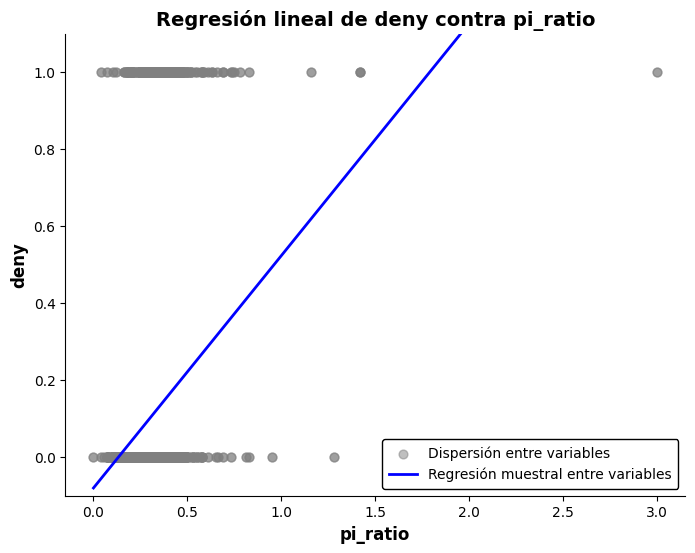

In [ ]:
# Se define estructura.
fig, ax = plt.subplots(figsize=(8, 6))

# Gráfico de dispersión con línea de regresión.
sns.regplot(
    x='pi_ratio', y='deny', data=df, ci=None, 
    scatter_kws={'alpha': 0.5, 's': 40, 'color': 'gray'}, 
    line_kws={'color': 'blue', 'linewidth': 2}, 
    ax=ax
)

# Personalización.
ax.set_xlabel('pi_ratio', fontsize=12, fontweight='bold', color='black')
ax.set_ylabel('deny', fontsize=12, fontweight='bold', color='black')
ax.set_title('Regresión lineal de deny contra pi_ratio', fontsize=14, fontweight='bold', color='black')

# Limitar el eje Y.
ax.set_ylim(-0.1, 1.1)

# Eliminar bordes superiores y derechos.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Leyenda.
scatter_legend = ax.scatter(df['pi_ratio'], df['deny'], alpha=0.5, s=40, color='gray', label="Dispersión entre variables")
line_legend, = ax.plot([], [], color='blue', linewidth=2, label="Regresión muestral entre variables")  
ax.legend(
    loc='lower right',  
    fontsize=10, 
    frameon=True,  
    facecolor='white',  
    edgecolor='black',  
    framealpha=1,
    borderpad=0.5
)
plt.show()

**Ejercicio 1.2.**

In [68]:
# Se definen variables.
x1 = df[['pi_ratio']]
y = df['deny']

In [67]:
ols_results = ols_estimation(y, x1)
ols_results

,independent_variable,coefficients,standard_errors,t_value,p_value,lower_interval,upper_interval
0,_const,-0.0799,0.0212,-3.7768,0.0002,-0.1214,-0.0384
1,pi_ratio,0.6035,0.0608,9.9200,0.0000,0.4842,0.7228


**Ejercicio 1.3.**

In [70]:
# Se definen variables.
x2 = df[['pi_ratio', 'black']]

In [71]:
ols_results2 = ols_estimation(y, x2)
ols_results2

,independent_variable,coefficients,standard_errors,t_value,p_value,lower_interval,upper_interval
0,_const,-0.0905,0.0208,-4.3542,0.0000,-0.1313,-0.0497
1,pi_ratio,0.5592,0.0599,9.3403,0.0000,0.4418,0.6766
2,black,0.1774,0.0184,9.6589,0.0000,0.1414,0.2134


**Ejercicios 1.4. y 1.5.**

In [ ]:
# Se presenta un modelo Logit.
model_logit = LogitProbitEstimation(y, x1)
result_logit = model_logit.fit()
model_logit.summary_custom(column_names=x1.columns)

,independent_variable,coefficients,standard_errors,z_value,p_value,lower_interval,upper_interval
0,_const,-4.0284,0.2686,-14.9992,0.0000,-4.5548,-3.5020
1,pi_ratio,5.8845,0.7336,8.0214,0.0000,4.4466,7.3224


In [99]:
model_logit.marginal_effects(column_names=x1.columns)

,independent_variable,mean_marginal_effect,avg_marginal_effect
0,pi_ratio,0.5801,0.5907


In [ ]:
# Se presenta un modelo Probit.
model_probit = LogitProbitEstimation(y, x1, model_type='probit')
result_probit = model_probit.fit()
model_probit.summary_custom(column_names=x1.columns)

,independent_variable,coefficients,standard_errors,z_value,p_value,lower_interval,upper_interval
0,_const,-2.1942,0.1290,-17.0103,0.0000,-2.4470,-1.9413
1,pi_ratio,2.9679,0.3591,8.2647,0.0000,2.2641,3.6718


In [104]:
model_probit.marginal_effects(column_names=x1.columns)

,independent_variable,mean_marginal_effect,avg_marginal_effect
0,pi_ratio,0.5678,0.5665


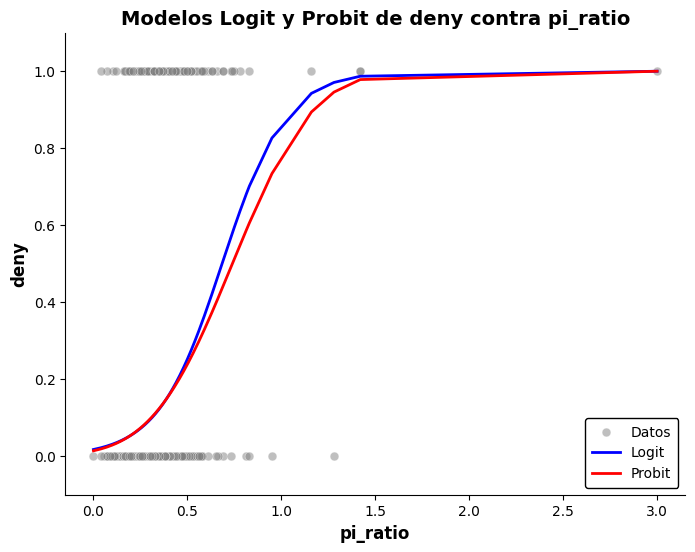

In [103]:
# Definir valores de pi_ratio ordenados para la curva.
pi_ratio_sorted = np.sort(df['pi_ratio'])
X_sorted = np.column_stack((np.ones(len(pi_ratio_sorted)), pi_ratio_sorted))

# Obtener predicciones de los modelos.
pred_logit = result_logit.predict(X_sorted)
pred_probit = result_probit.predict(X_sorted)

# Se define estructura.
fig, ax = plt.subplots(figsize=(8, 6))

# Gráfico de dispersión.
sns.scatterplot(
    x=df['pi_ratio'], y=df['deny'], alpha=0.5, s=40, color='gray', ax=ax, label="Datos"
)

# Curvas ajustadas.
ax.plot(pi_ratio_sorted, pred_logit, color='blue', linewidth=2, label="Logit")
ax.plot(pi_ratio_sorted, pred_probit, color='red', linewidth=2, label="Probit")

# Personalización.
ax.set_xlabel('pi_ratio', fontsize=12, fontweight='bold', color='black')
ax.set_ylabel('deny', fontsize=12, fontweight='bold', color='black')
ax.set_title('Modelos Logit y Probit de deny contra pi_ratio', fontsize=14, fontweight='bold', color='black')

# Limitar el eje Y.
ax.set_ylim(-0.1, 1.1)

# Eliminar bordes superiores y derechos.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Leyenda.
ax.legend(
    loc='lower right',  
    fontsize=10, 
    frameon=True,  
    facecolor='white',  
    edgecolor='black',  
    framealpha=1,
    borderpad=0.5
)

# Guardar en alta resolución para publicación.
plt.savefig("logit_probit_regresion.png", dpi=300, bbox_inches='tight')

plt.show()

**Ejercicio 1.6.**

In [ ]:
model_logit2 = LogitProbitEstimation(y, x2)
result_logit2 = model_logit2.fit()
model_logit2.summary_custom(column_names=x2.columns)

,independent_variable,coefficients,standard_errors,z_value,p_value,lower_interval,upper_interval
0,_const,-4.1256,0.2684,-15.3700,0.0000,-4.6517,-3.5995
1,pi_ratio,5.3704,0.7283,7.3736,0.0000,3.9429,6.7979
2,black,1.2728,0.1462,8.7059,0.0000,0.9862,1.5593


In [107]:
model_logit2.marginal_effects(column_names=x2.columns)

,independent_variable,mean_marginal_effect,avg_marginal_effect
0,pi_ratio,0.4949,0.5183
1,black,0.1173,0.1228


In [ ]:
model_probit2 = LogitProbitEstimation(y, x2, model_type='probit')
result_probit2 = model_probit2.fit()
model_probit2.summary_custom(column_names=x2.columns)

,independent_variable,coefficients,standard_errors,z_value,p_value,lower_interval,upper_interval
0,_const,-2.2587,0.1299,-17.3907,0.0000,-2.5133,-2.0042
1,pi_ratio,2.7416,0.3596,7.6244,0.0000,2.0368,3.4464
2,black,0.7082,0.0834,8.4878,0.0000,0.5446,0.8717


In [109]:
model_probit2.marginal_effects(column_names=x2.columns)

,independent_variable,mean_marginal_effect,avg_marginal_effect
0,pi_ratio,0.5002,0.5014
1,black,0.1292,0.1295


**Ejercicio 1.8.**

In [110]:
# Se definen variables.
x3 = df[['pi_ratio', 'black', 'hse_inc', 'loan_val', 'ccred', 'mcred', 'pubrec', 'denpmi', 'selfemp', 'single', 'hischl', 'probunmp', 'condo']] # Obs.: Se omite 'married' por ser...

In [ ]:
model_logit3 = LogitProbitEstimation(y, x3)
result_logit3 = model_logit3.fit()
model_logit3.summary_custom(column_names=x3.columns)

,independent_variable,coefficients,standard_errors,z_value,p_value,lower_interval,upper_interval
0,_const,-6.0466,0.6965,-8.6813,0.0000,-7.4118,-4.6815
1,pi_ratio,4.7984,1.0350,4.6363,0.0000,2.7699,6.8269
2,black,0.7037,0.1804,3.9008,0.0001,0.3501,1.0572
3,hse_inc,-0.4828,1.2370,-0.3903,0.6963,-2.9074,1.9417
4,loan_val,1.8039,0.4989,3.6160,0.0003,0.8261,2.7817
5,ccred,0.2964,0.0398,7.4402,0.0000,0.2183,0.3745
6,mcred,0.2417,0.1430,1.6901,0.0910,-0.0386,0.5220
7,pubrec,1.2313,0.2048,6.0127,0.0000,0.8299,1.6327
8,denpmi,4.5449,0.5544,8.1979,0.0000,3.4583,5.6315
9,selfemp,0.6471,0.2126,3.0439,0.0023,0.2304,1.0638


In [112]:
model_logit3.marginal_effects(column_names=x3.columns)

,independent_variable,mean_marginal_effect,avg_marginal_effect
0,pi_ratio,0.3288,0.3610
1,black,0.0482,0.0529
2,hse_inc,-0.0331,-0.0363
3,loan_val,0.1236,0.1357
4,ccred,0.0203,0.0223
5,mcred,0.0166,0.0182
6,pubrec,0.0844,0.0926
7,denpmi,0.3114,0.3419
8,selfemp,0.0443,0.0487
9,single,0.0308,0.0338


In [ ]:
model_probit3 = LogitProbitEstimation(y, x3, model_type='probit')
result_probit3 = model_probit3.fit()
model_probit3.summary_custom(column_names=x3.columns)

,independent_variable,coefficients,standard_errors,z_value,p_value,lower_interval,upper_interval
0,_const,-3.1017,0.3635,-8.5333,0.0000,-3.8142,-2.3893
1,pi_ratio,2.5009,0.5304,4.7149,0.0000,1.4612,3.5405
2,black,0.3957,0.0988,4.0043,0.0001,0.2020,0.5894
3,hse_inc,-0.3766,0.6548,-0.5752,0.5651,-1.6600,0.9067
4,loan_val,0.7872,0.2430,3.2396,0.0012,0.3109,1.2635
5,ccred,0.1575,0.0216,7.3048,0.0000,0.1153,0.1998
6,mcred,0.1224,0.0750,1.6313,0.1028,-0.0247,0.2695
7,pubrec,0.7059,0.1190,5.9327,0.0000,0.4727,0.9391
8,denpmi,2.5668,0.2838,9.0449,0.0000,2.0106,3.1231
9,selfemp,0.3412,0.1124,3.0348,0.0024,0.1208,0.5616


In [114]:
model_probit3.marginal_effects(column_names=x3.columns)

,independent_variable,mean_marginal_effect,avg_marginal_effect
0,pi_ratio,0.3697,0.3622
1,black,0.0585,0.0573
2,hse_inc,-0.0557,-0.0545
3,loan_val,0.1164,0.1140
4,ccred,0.0233,0.0228
5,mcred,0.0181,0.0177
6,pubrec,0.1043,0.1022
7,denpmi,0.3794,0.3718
8,selfemp,0.0504,0.0494
9,single,0.0363,0.0356


#### **EJERCICIO 2.**
Este ejercicio analiza el impacto de diferentes grados de truncamiento en el **Modelo Tobit**.

**Se presentan una función y una clase que se utilizarán en el apartado 1:**
- **Función ols_estimation:** realiza estimación OLS;
- **Clase LogitProbit_estimation:** realiza estimación Logit y Probit.

**Observación:** en la mayoría de los casos, se prescinde del uso de librerías como *statsmodels*, que incluyen implementaciones de OLS, Logit y Probit, con el fin de aplicar las ecuaciones vistas en clase, lo que aporta mayor claridad. Para operaciones matriciales, se utiliza la librería *numpy*. Para el desarrollo de la clase **LogitProbit_estimation**, se utilizó la clase GenericLikelihoodModel de *statsmodels*, con el objetivo de utilizar métodos de optimización eficientes y confiables en la estimación de los parámetros de la log-verosimilitud definida. Se ha contrastado que **todos los resultados sean consistentes con los obtenidos en Stata**. 

In [ ]:
def generate_latent_variable_df(n_observations: int = 2000, target_negative_proportion: float = 0.30, heteroskedastic: bool = False) -> tuple[pd.DataFrame, pd.DataFrame]:
    
    """
    Genera un DataFrame con una variable latente y su versión truncada.

    La función simula una variable latente dependiente `y*` a partir de una regresión lineal 
    con una variable independiente `x` (distribuida uniformemente en [0,1]) y un 
    término de error `u` que puede ser homocedástico o heterocedástico.

    El término de error `u` sigue una distribución normal con media 0. En el caso 
    homocedástico, su varianza es constante y igual a 3. En el caso heterocedástico, 
    su desviación estándar depende de `z`, una variable correlacionada pero no 
    perfectamente con `x`, con una estructura de varianza dada por `(2 * z)`.

    Parámetros
    ----------
    n_observations : int, opcional
        Número de observaciones a generar (por defecto 2000).
    target_negative_proportion : float, opcional
        Proporción objetivo de valores negativos en `y` (por defecto 0.30).
    heteroskedastic : bool, opcional
        Si es `True`, se introduce heterocedasticidad en el término de error `u` 
        (por defecto `False`).

    Retorna
    -------
    df : pandas.DataFrame
        DataFrame con las variables generadas:
        - 'num_obs': índice de observaciones.
        - 'y': variable dependiente generada.
        - 'k': valor final de k tras iteraciones.
        - 'x': variable independiente.
        - 'u': término de error.

    df_t : pandas.DataFrame
        Versión truncada del DataFrame, que solo incluye observaciones donde `y*` ≥ 0.
    """

    k = 0  # Inicializar con un valor de k = 0.
    negative_proportion = 1.0  # Valor inicial para la proporción de valores negativos.

    while abs(negative_proportion - target_negative_proportion) > 0.01:  # Condición de ajuste.
        # Generar x.
        x = np.random.uniform(0, 1, n_observations)  # x ~ uniform[0, 1].
        
        # Generar u.
        if heteroskedastic:
            z = x + np.random.normal(0, 0.1, n_observations)  # Variable correlacionada pero no perfectamente con x.
            sigma_u = np.sqrt(2 * z)  # Heterocedasticidad. Se elige 2 arbitrariamente. 
        else:
            sigma_u = np.full(n_observations, np.sqrt(3))  # Homocedasticidad.        
        u = np.random.normal(0, sigma_u, n_observations)

        # Generar y.
        y = k + 3 * x + u
        
        # Proporción de y negativos.
        negative_proportion = np.sum(y < 0) / n_observations

        # Ajustae en k.
        k -= 0.1  
        
    # Crear DataFrame con variables generadas.
    df = pd.DataFrame({
        'num_obs': np.arange(1, n_observations + 1),
        'y': y,
        'k': k,
        'x': x,
        'u': u
    })

    # Crear muestra truncada.
    df_t = df[df['y']>=0].copy()

    return df, df_t

In [ ]:
class LogitProbitEstimation(GenericLikelihoodModel):
    
    """
    Modelo de regresión binaria basado en máxima verosimilitud para Logit y Probit.
    Se basa en la clase `GenericLikelihoodModel` de `statsmodels` que permite obtener estimaciones 
    mediante máxima verosimilitud, luego de determinar la correspondiente log-verosimilitud.

    Parámetros
    ----------
    endog : array-like
        Variable dependiente binaria (0 o 1).
    exog : array-like
        Matriz de variables explicativas (incluyendo la constante si es necesario).
    model_type : str, opcional
        Tipo de modelo a estimar: "logit" o "probit". Por defecto, "logit".
    **kwargs : dict, opcional
        Argumentos adicionales para `GenericLikelihoodModel`.

    Métodos
    -------
    loglike(params)
        Calcula la función de log-verosimilitud del modelo.
    
    fit(start_params=None, disp=0, **kwargs)
        Ajusta el modelo mediante máxima verosimilitud.

    marginal_effects(at="mean", column_names=None)
        Calcula los efectos marginales de las variables independientes:
            - "mean": evaluado en la media de las variables.
            - "average": promedio de los efectos marginales individuales.

    summary_custom(column_names=None)
        Genera un resumen de los coeficientes estimados, errores estándar y otros 
        estadísticos relevantes.
    """
    
    def __init__(self, endog, exog, model_type="logit", add_intercept=True, **kwargs):
        if add_intercept:
            exog = np.column_stack((np.ones(len(exog)), exog))
        
        super().__init__(endog, exog, **kwargs)
        
        if model_type not in ["logit", "probit"]:
            raise ValueError("El parámetro 'model_type' debe ser 'logit' o 'probit'")
        self.model_type = model_type
    
    def loglike(self, params):
        exog = self.exog
        endog = self.endog
        linear_pred = np.dot(exog, params)

        if self.model_type == "logit":
            p = 1 / (1 + np.exp(-linear_pred))
        elif self.model_type == "probit":
            p = 0.5 * (1 + erf(linear_pred / np.sqrt(2)))

        # Asegurar que p no sea 0 ni 1.
        p = np.clip(p, 1e-10, 1 - 1e-10)
        
        return (endog * np.log(p) + (1 - endog) * np.log(1 - p)).sum()
    
    def fit(self, start_params=None, disp=0, **kwargs):
        warnings.filterwarnings('ignore', category=UserWarning)
        
        if self.model_type == "logit":
            init_model = Logit(self.endog, self.exog).fit(disp=0)
        else:
            init_model = Probit(self.endog, self.exog).fit(disp=0)

        self.results = super().fit(start_params=init_model.params, disp=disp, **kwargs)
        self.params = self.results.params  
        
        return self.results
    
    def predict(self, params=None, exog=None):
        if params is None:
            params = self.params 
        if exog is None:
            exog = self.exog

        linear_pred = np.dot(exog, params)

        if self.model_type == "logit":
            pred = 1 / (1 + np.exp(-linear_pred))
        elif self.model_type == "probit":
            pred = 0.5 * (1 + erf(linear_pred / np.sqrt(2)))

        return pred

    def marginal_effects(self, column_names=None):
        params = self.params
        exog = self.exog
        linear_pred = np.dot(exog, params)

        if self.model_type == "logit":
            density = np.exp(-linear_pred) / (1 + np.exp(-linear_pred))**2
        elif self.model_type == "probit":
            density = (1 / np.sqrt(2 * np.pi)) * np.exp(-0.5 * linear_pred**2)

        x_mean = np.mean(exog, axis=0)
        mean_pred = np.dot(x_mean, params)
        
        if self.model_type == "logit":
            mean_p = 1 / (1 + np.exp(-mean_pred))
            mean_marginal_effect = mean_p * (1 - mean_p) * params
        elif self.model_type == "probit":
            mean_p = (1 / np.sqrt(2 * np.pi)) * np.exp(-0.5 * mean_pred**2)
            mean_marginal_effect = mean_p * params

        avg_marginal_effect = np.mean(density, axis=0) * params

        # Asignar nombres a las variables independientes
        if column_names is None:
            column_names = [f'Variable {i}' for i in range(1, exog.shape[1])]

        marginal_effects_list = [
            {"independent_variable": column_names[i - 1], "mean_marginal_effect": mean_marginal_effect[i], 'avg_marginal_effect': avg_marginal_effect[i]}
            for i in range(1, exog.shape[1])
        ]
        
        return pd.DataFrame(marginal_effects_list)
    
    def summary_custom(self, column_names=None):
        params = self.params
        std_errors = self.results.bse

        if column_names is None:
            column_names = [f'Variable {i}' for i in range(self.exog.shape[1])]
        else:
            column_names = ['_const'] + list(column_names)

        z_values = params / std_errors
        p_values = 2 * (1 - norm.cdf(np.abs(z_values)))
        ci = 1.96 * std_errors
        lower_interval = params - ci
        upper_interval = params + ci

        results_df = pd.DataFrame({
            'independent_variable': column_names,
            'coefficients': params,
            'standard_errors': std_errors,
            'z_value': z_values,
            'p_value': p_values,
            'lower_interval': lower_interval,
            'upper_interval': upper_interval
        })

        return results_df

In [ ]:
class TruncatedTobit(GenericLikelihoodModel):
    
    def __init__(self, endog, exog, left=None, right=None, add_intercept=True, **kwds):
        super(TruncatedTobit, self).__init__(endog, exog, **kwds)
        self.left = left if left is not None else -np.inf
        self.right = right if right is not None else np.inf

        if add_intercept:
            exog = np.column_stack((np.ones(len(exog)), exog))

        super().__init__(endog, exog, **kwds)

    def loglikeobs(self, params):
        s = params[-1]
        beta = params[:-1]
        
        linear_pred = np.dot(self.exog, beta)
        _l = (self.left - linear_pred) / np.exp(s)
        _r = (self.right - linear_pred) / np.exp(s)
        return truncnorm.logpdf(self.endog, a=_l, b=_r, loc=linear_pred, scale=np.exp(s))

    def fit(self, cov_type='nonrobust', disp=0, start_params=None, maxiter=10000, maxfun=10000, **kwds):
        warnings.filterwarnings('ignore', category=UserWarning)

        if 'Log(Sigma)' not in self.exog_names:
            self.exog_names.append('Log(Sigma)')
        
        res_ols = sm.OLS(self.endog, self.exog).fit(disp=disp)
        params_ols = res_ols.params
        sigma_ols = np.log(np.std(res_ols.resid))
        
        if start_params is None:
            start_params = np.append(params_ols, sigma_ols)
        
        self.results = super(TruncatedTobit, self).fit(cov_type=cov_type, start_params=start_params,
                                         maxiter=maxiter, maxfun=maxfun, disp=disp, **kwds)
        self.params = self.results.params  
        
        return self.results

    def marginal_effects(self, column_names=None):
        params = self.params
        s = params[-1]
        beta = params[:-1]
        exog = self.exog
        linear_pred = np.dot(exog, beta)
        w = linear_pred / s
        mills_ratio = norm.pdf(w) / (norm.cdf(w))

        avg_marginal_effect = (1 - w * mills_ratio - mills_ratio**2)

        # Asignar nombres a las variables independientes
        if column_names is None:
            column_names = [f'Variable {i}' for i in range(1, exog.shape[1])]

        marginal_effects_list = [
            {"independent_variable": column_names[i - 1], "avg_marginal_effect": avg_marginal_effect * beta[i]}
            for i in range(1, exog.shape[1])
        ]
        
        return pd.DataFrame(marginal_effects_list)
    
    def summary_custom(self, column_names=None):
        params = self.params
        std_errors = self.results.bse

        if column_names is None:
            column_names = [f'Variable {i}' for i in range(self.exog.shape[1])]
        else:
            column_names = ['_const'] + list(column_names) + ['ln(sigma)']

        z_values = params / std_errors
        p_values = 2 * (1 - norm.cdf(np.abs(z_values)))
        ci = 1.96 * std_errors
        lower_interval = params - ci
        upper_interval = params + ci

        results_df = pd.DataFrame({
            'independent_variable': column_names,
            'coefficients': params,
            'standard_errors': std_errors,
            'z_value': z_values,
            'p_value': p_values,
            'lower_interval': lower_interval,
            'upper_interval': upper_interval
        })

        return results_df

In [ ]:

class CensoredTobit(GenericLikelihoodModel):
    """
    Tobit model that handles left and right censoring. The censoring is indicated
    by the `cens` array with:
      -1: left-censored
       0: uncensored
       1: right-censored
       
    Parameters:
    -----------
    endog : array-like
        Dependent variable
    exog : array-like
        Independent variables
    cens : array-like
        Censoring indicator with values in {-1, 0, 1}
    left : float, optional
        Threshold value for left censoring (default: 0)
    right : float, optional
        Threshold value for right censoring (default: 0)
    """

    def __init__(self, endog, exog, cens, left=None, right=None, **kwds):
        super(CensoredTobit, self).__init__(endog, exog, **kwds)
        self.cens = cens
        self.left = left if left is not None else 0
        self.right = right if right is not None else 0

    def loglikeobs(self, params):
        """
        Log-likelihood function for the Tobit model.
        Calculates log-likelihood for censored, uncensored, and left-right censored observations.
        """
        s = params[-1]
        beta = params[:-1]

        def _tobit(y, x, z, left, right, beta, s):
            if (~np.isin(z, [-1, 0, 1])).any():
                warnings.warn('\n\n***************************************************\n\n' +
                              'There are values other than [-1, 0, 1] in a column for cens\n\n' +
                             '***************************************************')

            # indicadores
            left_on = np.where(z == -1, 1, 0)
            mid_on = np.where(z == 0, 1, 0)
            right_on = np.where(z == 1, 1, 0)

            Xb = np.dot(x, beta)

            # Log-likelihood components for Tobit model
            left_mle = left_on * stats.norm.logcdf((left - Xb) / np.exp(s))
            mid_mle = mid_on * (stats.norm.logpdf((y - Xb) / np.exp(s)) - s)
            right_mle = right_on * stats.norm.logcdf((Xb - right) / np.exp(s))

            return left_mle + mid_mle + right_mle  # Log-likelihood for each observation

        return _tobit(self.endog, self.exog, self.cens, self.left, self.right, beta, s)

    def fit(self, cov_type='nonrobust', start_params=None, maxiter=10000, maxfun=10000, **kwds):
        """
        Fit the Tobit model by estimating the parameters using Maximum Likelihood.
        """
        # Add 'Log(Sigma)' to exog names if not already present
        if 'Log(Sigma)' not in self.exog_names:
            self.exog_names.append('Log(Sigma)')
        
        # Initial parameter estimates using OLS
        res = sm.OLS(self.endog, self.exog).fit()
        ols_params = res.params
        ols_sigma = np.log(np.std(res.resid))

        # Use the OLS estimates for the initial values if not provided
        if start_params is None:
            start_params = np.append(ols_params, ols_sigma)

        # Fit the Tobit model using the base class method
        res = super(CensoredTobit, self).fit(cov_type=cov_type, start_params=start_params,
                                               maxiter=maxiter, maxfun=maxfun, **kwds)
        
        
        return res
    
    def summary_with_t(self):
        results = self.fit()
        params = results.params
        std_err = results.bse
        df_resid = results.df_resid 
        
        t_values = params / std_err
        p_values = 2 * (1 - stats.t.cdf(abs(t_values), df_resid))
        
        summary_df = pd.DataFrame({
            'Coef.': params,
            'Std. Err.': std_err,
            't': t_values,
            'P>|t|': p_values,
            '[0.025': params - 1.96 * std_err,
            '0.975]': params + 1.96 * std_err
        })
        
        return summary_df

In [48]:
path = r"C:\Users\HP\OneDrive\Escritorio\David Guzzi\DiTella\MEC\Materias\2024\2024 3T\[MT06] Microeconometría I\Clases\Stata\Archivos Stata-20250107\laborsub.dta"

laborsub, meta = st.read_dta(path)
laborsub.head()

,lfp,whrs,kl6,k618,wa,we
0,1,1610,1,0,32,12
1,1,1656,0,2,30,12
2,1,1980,1,3,35,12
3,1,456,0,3,34,12
4,1,1568,1,2,31,14


In [74]:
laborsub2 = laborsub[laborsub['whrs'] > 0]
y = laborsub2["whrs"]
x = laborsub2[["kl6", "k618", "wa", "we"]]
model = TruncatedTobit(y, x, left=0)
results = model.fit()
model.summary_custom(column_names=x.columns)

Len params: 6
Len column_names: 6


,independent_variable,coefficients,standard_errors,z_value,p_value,lower_interval,upper_interval
0,_const,1586.2598,912.3214,1.7387,0.0821,-201.8901,3374.4097
1,kl6,-803.0038,321.3611,-2.4988,0.0125,-1432.8715,-173.1361
2,k618,-172.8749,88.7285,-1.9484,0.0514,-346.7829,1.0330
3,wa,-8.8211,14.3684,-0.6139,0.5393,-36.9831,19.3409
4,we,16.5287,46.5021,0.3554,0.7223,-74.6154,107.6729
5,ln(sigma),6.8913,0.0960,71.7810,0.0000,6.7032,7.0795


In [31]:
laborsub2 = laborsub[laborsub['whrs'] > 0]
y = laborsub["whrs"]
x = laborsub[["kl6", "k618", "wa", "we"]]
X = sm.add_constant(x)
laborsub['cens'] = np.where(laborsub['whrs'] == 0, -1, 0)
model = MyCensoredTobit(y, X, cens=laborsub['cens'], left=0)
results = model.fit()
model.summary_with_t()

Optimization terminated successfully.
         Current function value: 5.468361
         Iterations: 566
         Function evaluations: 894


c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:2748: UserWarning: df_model + k_constant + k_extra differs from k_params
  warnings.warn("df_model + k_constant + k_extra "
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:2752: UserWarning: df_resid differs from nobs - k_params
  warnings.warn("df_resid differs from nobs - k_params")


Optimization terminated successfully.
         Current function value: 5.468361
         Iterations: 566
         Function evaluations: 894


,Coef.,Std. Err.,t,P>|t|,[0.025,0.975]
0,589.0003,841.5886,0.6999,0.4847,-1060.5133,2238.5138
1,-827.7658,214.7518,-3.8545,0.0001,-1248.6793,-406.8522
2,-140.0192,74.2271,-1.8864,0.0604,-285.5043,5.4659
3,-24.9792,13.2571,-1.8842,0.0607,-50.9630,1.0046
4,103.6896,41.8263,2.4791,0.0138,21.7102,185.6691
5,7.1777,0.0632,113.6283,0.0000,7.0539,7.3015


In [32]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           MyCensoredTobit Results                            
==============================================================================
Dep. Variable:                   whrs   Log-Likelihood:                -1367.1
Model:                MyCensoredTobit   AIC:                             2744.
Method:            Maximum Likelihood   BIC:                             2762.
Date:                Mon, 03 Mar 2025                                         
Time:                        14:24:14                                         
No. Observations:                 250                                         
Df Residuals:                     245                                         
Df Model:                           4                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        589.0003    841.589      0.700      0.484   -1060.483    2238.484
kl6         -827.7658    214.752     -3.855      0.000   -1248.672    -406.860
k618        -140.0192     74.227     -1.886      0.059    -285.502       5.463
wa           -24.9792     13.257     -1.884      0.060     -50.963       1.004
we           103.6896     41.826      2.479      0.013      21.712     185.668
Log(Sigma)     7.1777      0.063    113.628      0.000       7.054       7.302
==============================================================================
"""

In [33]:
import numpy as np
from scipy.stats import norm

# Parámetros estimados
alpha = 589.0003
beta_kl6 = -827.7658
beta_k618 = -140.0192
beta_wa = -24.9792
beta_we = 103.6896	
sigma = np.exp(7.1777	)  # Convertir log(sigma) a sigma

# Variables
kl6_values = np.array(laborsub['kl6'])
k618_values = np.array(laborsub['k618'])
wa_values = np.array(laborsub['wa'])
we_values = np.array(laborsub['we'])

# Calcular w para cada observación
w = (alpha + beta_kl6 * kl6_values + beta_k618 * k618_values + beta_wa * wa_values + beta_we * we_values) / sigma

# Calcular la razón de Mills inversa
mills_ratio = norm.pdf(w) / (norm.cdf(w))

# Calcular efectos marginales ajustados por truncamiento
marginal_effect_kl6_avg = np.mean((1 - w * mills_ratio - mills_ratio**2) * beta_kl6)
marginal_effect_k618_avg = np.mean((1 - w * mills_ratio - mills_ratio**2) * beta_k618)
marginal_effect_wa_avg = np.mean((1 - w * mills_ratio - mills_ratio**2) * beta_wa)
marginal_effect_we_avg = np.mean((1 - w * mills_ratio - mills_ratio**2) * beta_we)

print("Efecto marginal promedio para kl6:", marginal_effect_kl6_avg)
print("Efecto marginal promedio para k618:", marginal_effect_k618_avg)
print("Efecto marginal promedio para wa:", marginal_effect_wa_avg)
print("Efecto marginal promedio para we:", marginal_effect_we_avg)

Efecto marginal promedio para kl6: -367.14230877302157
Efecto marginal promedio para k618: -62.103281339421684
Efecto marginal promedio para wa: -11.07912547160448
Efecto marginal promedio para we: 45.989867109454266


In [ ]:
y = df["whrs"]
x = df[["kl6", "k618", "wa", "we"]]
X = sm.add_constant(x)
df['cens'] = np.where(df['whrs'] == 0, -1, 0)
cens = df['cens']

model = MyCensoredTobit(y, X, cens, left=0)
results = model.fit()

In [7]:
df, df_t = generate_latent_variable_df()
df.head(1)

,num_obs,y,k,x,u
0,1,0.2328,-0.5000,0.2780,-0.2012


In [9]:
df[df['y']<0].shape[0] / df.shape[0]

0.2925

In [8]:
df_t.head(1)

,num_obs,y,k,x,u
0,1,0.2328,-0.5000,0.2780,-0.2012


In [10]:
df.shape[0], df_t.shape[0]

(2000, 1415)

In [14]:
df['k'].unique(), df_t['k'].unique()

(array([-0.5]), array([-0.5]))

In [13]:
y = df['y']
x = df[['x']]
ols_results = ols_estimation(y, x)
ols_results

,independent_variable,coefficients,standard_errors,t_value,p_value,lower_interval,upper_interval
0,_const,-0.3479,0.0775,-4.4869,0.0000,-0.4999,-0.1958
1,x,2.8593,0.1350,21.1778,0.0000,2.5945,3.1241


In [15]:
y2 = df_t['y']
x2 = df_t[['x']]
ols_results2 = ols_estimation(y2, x2)
ols_results2

,independent_variable,coefficients,standard_errors,t_value,p_value,lower_interval,upper_interval
0,_const,1.1288,0.0781,14.4451,0.0000,0.9755,1.2821
1,x,1.5660,0.1255,12.4828,0.0000,1.3199,1.8121




(a) Genera 200 valores de una variable latente 
𝑦
∗
=
𝑘
+
3
𝑥
+
𝑢
y 
∗
 =k+3x+u, donde 
𝑢
∼
𝑁
(
0
,
3
)
u∼N(0,3) y el regresor 
𝑥
∼
Uniforme
[
0
,
1
]
x∼Uniforme[0,1]. Elige 
𝑘
k de manera que aproximadamente el 30% de los valores de 
𝑦
∗
y 
∗
  sean negativos.

(b) Genera una submuestra censurada o truncada excluyendo las observaciones que correspondan a 
𝑦
∗
<
0
y 
∗
 <0.

(c) Estima el modelo usando las 2,000 observaciones completas, suponiendo que la variable latente es observable, mediante Mínimos Cuadrados Ordinarios (OLS). Evalúa tus resultados a la luz de las propiedades teóricas de OLS, teniendo en cuenta que solo tienes una replicación.

(d) Utilizando solo la submuestra truncada con 
𝑦
>
0
y>0, estima el modelo mediante OLS.

(e) Usa la opción de máxima verosimilitud truncada para estimar los parámetros con todas las observaciones. Evalúa tus resultados considerando las propiedades del estimador de máxima verosimilitud truncado. Compara con los resultados obtenidos por mínimos cuadrados en las dos partes anteriores.

(f) Repite todos los pasos anteriores utilizando un valor de 
𝑘
k que genere el 20%, 40% y 50% de observaciones censuradas. Compara tus resultados con los obtenidos con el 30% de censura. A partir de esto, sugiere cuál es la consecuencia de mayores niveles de censura en las estimaciones de los parámetros. Refuerza tus argumentos con teoría cuando sea posible.

(g) Genera 
𝑦
∗
y 
∗
  con heterocedasticidad haciendo que 
𝑢
∼
𝑁
(
0
,
𝜎
2
𝑧
)
u∼N(0,σ 
2
 z), donde 
𝑧
>
0
z>0 es una variable adecuada que esté correlacionada con 
𝑥
x, pero no de manera perfecta. Nuevamente, ajusta 
𝑘
k para obtener aproximadamente un 30% de observaciones censuradas. Utiliza el estimador de máxima verosimilitud para un modelo censurado normal para estimar este modelo y compara los resultados con el caso homocedástico correspondiente.

Si el modelo es una regresión lineal (OLS) y deny es binaria (0 o 1), el uso de este modelo no es ideal porque:

Puede predecir probabilidades fuera del rango [0,1]
No modela correctamente relaciones no lineales entre la variable independiente y la probabilidad de aprobación.

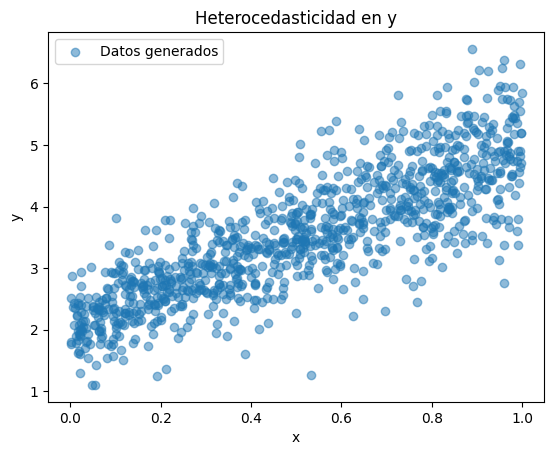

In [278]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
n = 1000  # Número de observaciones
beta_0 = 2  # Intercepto
beta_1 = 3  # Coeficiente de x
sigma2 = 0.5  # Escala para la heterocedasticidad
tau2 = 0.1  # Variabilidad en z

# Generar x ~ Uniform(0,1)
x = np.random.uniform(0, 1, size=n)

# Generar z = x + v, donde v ~ N(0, tau2)
v = np.random.normal(0, np.sqrt(tau2), size=n)
z = np.abs(x + v) + 0.1  # Asegurar que z > 0

# Generar u ~ N(0, sigma^2 * z)
u = np.random.normal(0, np.sqrt(sigma2 * z), size=n)

# Generar y
y = beta_0 + beta_1 * x + u

# Visualizar heterocedasticidad
plt.scatter(x, y, alpha=0.5, label="Datos generados")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Heterocedasticidad en y")
plt.legend()
plt.show()

significa que, manteniendo pi_ratio constante:
Ser black (black = 1) aumenta la probabilidad de aprobación del crédito en aproximadamente 0.177 en comparación con no serlo (black = 0).
Es decir, en igualdad de condiciones en pi_ratio, las personas identificadas como black tienen una mayor probabilidad de que su crédito sea aprobado.

Para una persona con un valor promedio de pi_ratio, el hecho de ser black aumenta la probabilidad de aprobación del crédito en aproximadamente 12.92 puntos porcentuales (0.1292) en comparación con no serlo, manteniendo constante el valor de pi_ratio.